# 利用Python进行数据分析

## 第2章—引言

-----

### 来自bit.ly的1.usa.gov数据 

·文件中各行的格式为JSON，当我们只读取某个文件中的第一行，那么我们可以看到以下结果

In [5]:
filename = "C:/Users/chan/Desktop/python学习资料/利用python进行数据分析/appa/example.txt"
with open(filename) as f:
    print(f.readline())

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



·使用JSON模块，将JSON字符串转换成Python字典对象

In [6]:
import json
filename = "C:/Users/chan/Desktop/python学习资料/利用python进行数据分析/appa/example.txt"
records = [json.loads(line) for line in open(filename)]
print(records[0])
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11', 'c': 'US', 'nk': 1, 'tz': 'America/New_York', 'gr': 'MA', 'g': 'A6qOVH', 'h': 'wfLQtf', 'l': 'orofrog', 'al': 'en-US,en;q=0.8', 'hh': '1.usa.gov', 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf', 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991', 't': 1331923247, 'hc': 1331822918, 'cy': 'Danvers', 'll': [42.576698, -70.954903]}


{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

**上述存在列表推导式，所谓的列表推导式（list comprehension）这是一种在一组字符串（或一组别的对像上）执行一条相同操作的借鉴方式，比较不简洁的方式如下：

———————————————————————

In [7]:
path = "C:/Users/chan/Desktop/python学习资料/利用python进行数据分析/appa/example.txt"
p = []
for line in open(path):
    p.append(json.loads(line))
p[1]['tz']

'America/Denver'

————————————————————————

In [8]:
records[0]['tz']

'America/New_York'

  上面给出的是字符串对象形式，而不是其打印形式：

In [9]:
print(records[0]['tz'])

America/New_York


#### 用纯Python代码对时区进行计数

假设我们需要知道这个数据集中最经常出现的是哪一个时区‘tz’，我们有许多，首先，先用列表推导式取出一组时区：

In [10]:
time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

错误显示，并不是所有的记录都有数据，在列表推导式最后加上一个if条件语句

In [11]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

对时区进行计数：
    两种方法，一种比较难，只使用python的标准库，另一种比较简单，使用pandas
    
    第一种方法：

In [ ]:
def get_counts(sequence):
    counts={}
    for a in sequence:
        if a in counts:
            counts[a] += 1
        else:
            counts[a] = 1
    return counts
    print(counts[:5])
    
get_counts(time_zones[:10])

    如果非常了解Python标准库，那么我们可以将代码写得更加简洁一些：

In [ ]:
from collections import defaultdict
def get_counts2(sequence):
    counts = defaultdict(int) #所有得值将被初始化为0
    for a in sequence:
        counts[a] += 1
    return counts
get_counts2(time_zones[:10])

    直接将时区这一个变量传入，即可以对整体进行计数:

In [ ]:
counts=get_counts(time_zones)
print(counts["America/New_York"])
print(len(time_zones))

    如果想要获得前10的计数值，需要一些有关字典的处理技巧：

In [ ]:
def top_counts(count_dict,n=10):
    value_key_paris=[(count,tz) for tz,count in count_dict.items()]
    value_key_paris.sort()
    return value_key_paris[-n:]
counts=get_counts(time_zones)
top_counts(counts,10)

    我们可以在Python标准库中找到collections.Counter类，使得计数更为简单

In [ ]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

#### 用pandas对时区进行计数

DataFrame是pandas中最重要的数据结构，它用于将数据表示为一个表格。从一组原始记录中创建DataFrame是很简单的：

In [ ]:
from pandas import DataFrame, Series
import pandas as pd;import numpy as np
frame=DataFrame(records)
frame

这里的frame的输出形式是摘要视图，主要用于比较大的DataFrame对象。frame['tz']所返回的Series对象有一个value_counts方法，该方法可以让我们得到所需要的信息：

In [ ]:
frame['tz'][:10]

In [ ]:
tz_counts=frame['tz'].value_counts()
tz_counts[:10]

进一步地，我们使用Matplotlib绘图。

首先，需要对数据进行处理，对未知值填上一个替代之。fillna函数可以替换缺失值NA，而未知值（空字符串），则可以通过布尔型数组索引加以替换：

In [ ]:
clean_tz = frame['tz'].fillna("Missing")
clean_tz[clean_tz == ''] = 'Unknow'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

下面用plotly绘制直方图

In [ ]:
from plotly.graph_objs import Bar,Layout
from plotly import offline
x_values,y_values=[],[]
for n,c in tz_counts.items():
    x_values.append(n)
    y_values.append(c)
a=x_values[:10]
b=y_values[:10]

In [ ]:
data = [Bar(x=a ,y=b)]
my_layout = Layout(title='前十时区')
offline.plot({'data': data,'layout':my_layout},filename='appa.html')

利用tz_counts的plot方法可以得到一张水平条形图：

In [ ]:
import matplotlib.pyplot as plt
tz_counts[:10].plot(kind='barh',rot=0)

我们还可以对这种数据再进行多种处理，比如说，a字段中含有执行url短缩操作的浏览器，设备，应用程序等相关信息、

In [ ]:
frame['a'][1]

如何将所有的信息提出出来呢？需要用到Python内置的字符串函数和正则表达式,比如说我们可以将这种字符串的第一节分离出来并得到另外一份用户行为摘要

In [ ]:
results = Series([x.split()[0]] for x in frame.a.dropna())
results[:5]

In [ ]:
results[:5]
rresults_value_counts=results.value_counts()
rresults_value_counts[:8]

若想按Windows和非Windows用户对时区统计inx进行分解。为了简单起见，假定只要agent中含有“Windows”就认为该用户为Windows用户。由于有的agent确实，所以首先将它们从数据中移除：

In [ ]:
cframe=frame[frame.a.notnull()]

其次，根据a值计算出各行是否是Windows

In [ ]:
operating_system = np.where(cframe['a'].str.contains('Windows'),'Windows','Not Windows')

In [ ]:
operating_system[:5]

接下来可以根据时区和新得到的操作系统列表对数据进行分组：

In [ ]:
by_tz_os = cframe.groupby(['tz',operating_system])

然后通过size对分组结果进行计数（类似上面的value_counts函数），并利用unstack对技术结果进行重塑

In [ ]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [ ]:
agg_counts[:5]

最后，我们选取最常出现的时区。为了达到这个目的，根据agg_counts中行数构造了一个间接索引数组：

In [ ]:
indexer = agg_counts.sum(1).argsort()
indexer[:5]

然后通过take按照这个顺序截取了最后10行：

In [ ]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset

这里生成一张条形图。使用stacked=True来生成

In [ ]:
count_subset.plot(kind="barh",stacked=True)

进一步，将各行规范化为1

In [ ]:
normed_subset= count_subset.div(count_subset.sum(1),axis =0 )

In [ ]:
normed_subset.plot(kind="barh",stacked=True)

--------------------------

-----

### MovieLens 1M 数据集

MovieLens 1M数据集含有来自6000名用户对4000部电影的100万条评分数据，它分为三个表：评分，用户信息和电影信息。可以通过pandas.read_table 将表分别读到一个pandas DataFrame对象中

In [12]:
pwd

'C:\\Users\\chan\\Desktop\\python学习资料\\利用python进行数据分析'

In [13]:
cd C:\Users\chan\Desktop\python学习资料\利用python进行数据分析\appa\movielens

C:\Users\chan\Desktop\python学习资料\利用python进行数据分析\appa\movielens


In [14]:
import pandas as pd
from pandas import DataFrame

unames = ['user_id','gender','age','occupation','zip']
users = pd.read_table('users.dat',sep='::',header= None,names=unames)
rnames=['user_id','movie_id','rating','timestamp']
ratings = pd.read_table('ratings.dat',sep='::',header= None,names=rnames)
mnames =['movie_id','title','genres']
movies = pd.read_table('movies.dat',sep="::",header= None,names=mnames)

<ipython-input-14-b1c293724de8>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_table('users.dat',sep='::',header= None,names=unames)
<ipython-input-14-b1c293724de8>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_table('ratings.dat',sep='::',header= None,names=rnames)
<ipython-input-14-b1c293724de8>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_table('movi

In [15]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [16]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [17]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


使用meerge进行合并

In [18]:
data= pd.merge(pd.merge(users,ratings),movies)

In [19]:
data

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,M,18,17,47901,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,M,35,14,30030,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,M,18,17,92886,2845,1,958153068,White Boys (1999),Drama
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western


可以进行计算了，如计算每一步电影的平均得分，可以使用pivot_table方法：

In [20]:
mean_ratings = data.pivot_table('rating','title','gender',aggfunc='mean')
mean_ratings

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kj�rlighetens kj�tere) (1995),NaN,3.500000


*如果想要过滤掉评分数量少于250条的电影，为达到这个目的，首先需要对title进行分组，然后利用size（）得到一个含有各个电影分组大小的Series对象：

In [21]:
ratings_by_title = data.groupby('title').size()

In [22]:
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [23]:
active_titles = ratings_by_title.index[ratings_by_title >=250]

In [24]:
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

接下来，我们可以从前面的平均值中，找到相对应的值了

mean_ratings = mean_ratings.loc[active_titles]

注：DataFrame里面好像没有ix函数呀，P33页暂缓

In [30]:
mean_ratings = mean_ratings.loc[active_titles]

注：DataFrame里面好像没有ix函数呀，P33页暂缓
    
    原先的函数ix.改成了loc
    原先的函数sort_index()改成了sort_values

计算女性观众最喜欢的电影，可以对F列降序排列

In [33]:
top_female_ratings=mean_ratings.sort_values(by='F',ascending=False)
top_female_ratings

gender,F,M,diff
title,,,
"Close Shave, A (1995)",4.644444,4.473795,-0.170650
"Wrong Trousers, The (1993)",4.588235,4.478261,-0.109974
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589,-0.108060
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075,-0.178032
Schindler's List (1993),4.562602,4.491415,-0.071187
...,...,...,...
"Avengers, The (1998)",1.915254,2.017467,0.102213
Speed 2: Cruise Control (1997),1.906667,1.863014,-0.043653
Rocky V (1990),1.878788,2.132780,0.253992


#### 计算评分分歧

假设我们要找出男性与女性观众分歧最大的电影，一个办法是给mean_ratings加上一个用于存放平均分之差的列，并对其进行排序

In [25]:
mean_ratings['diff']=mean_ratings["M"]-mean_ratings["F"]

sorted_by_diff=mean_ratings.sort_index(by='diff')

In [35]:
sorted_by_diff=mean_ratings.sort_values(by='diff')
sorted_by_diff[:15]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


*上述方法出现了错误。解决办法：用.sort_values(by=…)替换.sort_index(by=…)。

如果只是想找出分歧最大的电影，而不考虑性别因素，则可以计算得分数据的方差或标准差

In [42]:
rating_std_by_title=data.groupby('title')['rating'].std() #根据电影名称分组的得分数据的标准差
rating_std_by_title=rating_std_by_title.loc[active_titles] #根据active_titles进行过滤
rating_std_by_title=rating_std_by_title.sort_values(ascending=False)[:10]
rating_std_by_title

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

---

---

### 1880-2010年间全美婴儿姓名

该文件是一个非常标准的逗号隔开的格式文件，所以可以用pandas.read_csv将其加载到DataFrame中

In [6]:
pwd

'C:\\Users\\chan\\Desktop\\python学习资料\\利用python进行数据分析'

In [7]:
cd C:\Users\chan\Desktop\python学习资料\利用python进行数据分析\datasets\babynames

C:\Users\chan\Desktop\python学习资料\利用python进行数据分析\datasets\babynames


In [8]:
import pandas as pd
names1880 = pd.read_csv('yob1880.txt',names=['name','sex','births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


我们可以用 births列的sex分组小计该年度births总计

In [9]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

#### 由于该数据集被分隔了多个文件，所以第一件事情就是要将所有数据都组转到一个DataFrame李米娜，并且加上一个year的字段。使用pandas.concat可以达到这个目的

In [10]:
years=range(1880,2011)

In [11]:
pieces = []
columns=['name','sex','births']

for year in years:
    path = 'yob%d.txt' % year
    frame = pd.read_csv(path,names=columns)
    
    frame['year']=year
    pieces.append(frame)
    
names=pd.concat(pieces,ignore_index=True)

这里需要注意几个事情，第一，concat默认是按行将多个DataFrame组合到一起的；第二，必须指定ignore_index=True，因为我们不希望保留read_csv所返回的原始行号。

In [12]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


有了这些数据，我们可以通过groupby或pivot_table在year和sex级别上对其进行聚合了，如图2-4所示 

In [13]:
total_births = names.pivot_table('births','year','sex',aggfunc=sum)

In [14]:
total_births.tail() #tail表示随机展示中间片段？

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

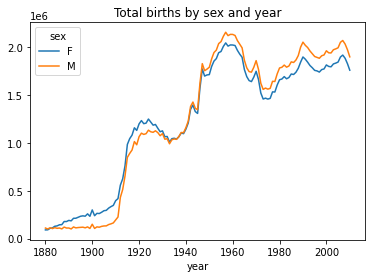

In [15]:
total_births.plot(title='Total births by sex and year')

接下来插入一个prop列，用于存放指定名字的婴儿数相对于总出生数的比例。prop值为0.02表示每100名婴儿中有2名取了当前这个名字。

In [16]:
def add_prop(group):
    births=group.births.astype(float)
    group['prop']= births / births.sum()
    return group

names = names.groupby(['year','sex']).apply(add_prop)

In [17]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


应该验证所有prop是否总和为1


In [18]:
import numpy as np
np.allclose(names.groupby(['year','sex']).prop.sum(),1)

True

取出一个子集

In [19]:
def get_top1000(group):
    return group.sort_values(by='births',ascending=False)[:1000]
grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)

In [20]:
top1000.tail()

name sex  births  year      prop
year sex                                            
2010 M   1677639  Camilo   M     194  2010  0.000102
         1677640  Destin   M     194  2010  0.000102
         1677641  Jaquan   M     194  2010  0.000102
         1677642  Jaydan   M     194  2010  0.000102
         1677645  Maxton   M     193  2010  0.000102

#### 分析命名趋势

In [21]:
boys= top1000[top1000.sex == 'M']
girls= top1000[top1000.sex == 'F']

total_births=top1000.pivot_table('births','year',columns='name',aggfunc=sum) 

#报错'year' is both an index level and a column label, which is ambiguous.

In [26]:
top_1000 = top1000.droplevel('year')                          # remove index
# print(top_1000_plot)
total_births_advance = top_1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

In [27]:
total_births_advance

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


NameError: name 'plt' is not defined

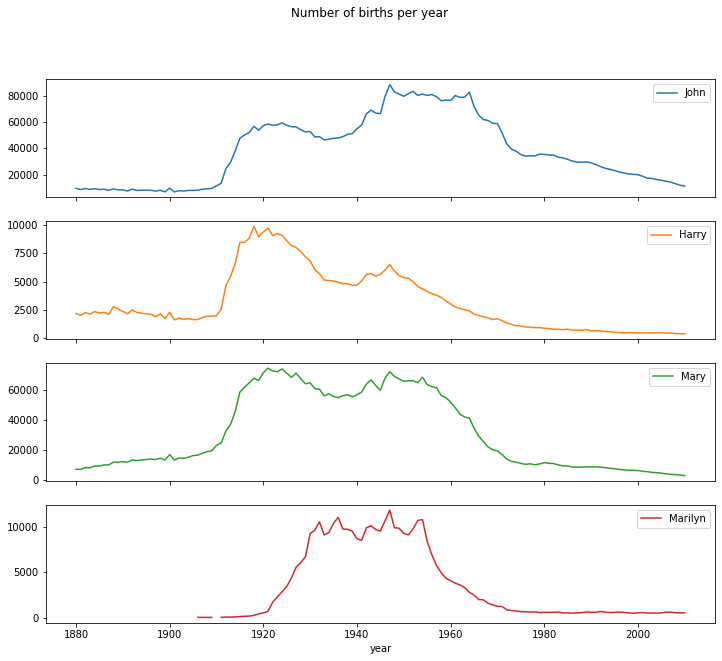

In [28]:
subset = total_births_advance[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False, title='Number of births per year')
plt.show()

#### 评估命名多样性的增长

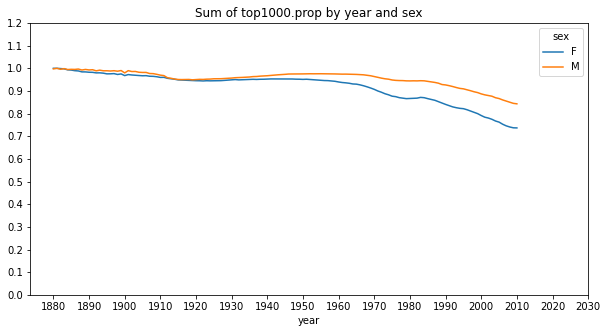

In [97]:
import numpy  as np
table=top_1000.droplevel('sex') .pivot_table('prop',index='year',columns='sex',aggfunc=sum)
table.plot(yticks=np.linspace(0,1.2,13),xticks=range(1880,2040,10),title='Sum of top1000.prop by year and sex',grid=False,figsize=(10,5))
plt.show()

在对prop降序排列之后，我们想知道前面多少个名字的人数加起来才够50%。使用Numpy的矢量方式。先计算prop的累计和cumsum，然后再通过searchsorted方法找出0.5应该被插入哪个位置才能保证不破坏顺序

In [31]:
df=boys[boys.year==2010]
prop_cumsum = df.sort_values(by='prop',ascending=False).prop.cumsum()

In [35]:
prop_cumsum.searchsorted(0.5)+1

117

由于数组索引是从0开始的，因此我们要给这个结果加1，即最终结果为117。拿1900年的数据来做个比较，这个数据要小得多

In [34]:
df=boys[boys.year==1900]
in1900 = df.sort_values(by = 'prop',ascending=False).prop.cumsum()
in1900.searchsorted(0.5)+1

25

对所有得year/sex组合执行这个计算。按照两个字段进行groupby处理，然后用一个函数计算各分组得这个值：

In [36]:
def get_quantitle_count(group,q=0.5):
    group = group.sort_values(by = 'prop',ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

In [39]:
diversity = top_1000.droplevel('sex').groupby(['year','sex']).apply(get_quantitle_count)
diversity=diversity.unstack('sex')

In [40]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<AxesSubplot:title={'center':'Number of popular names in top 50%'}, xlabel='year'>

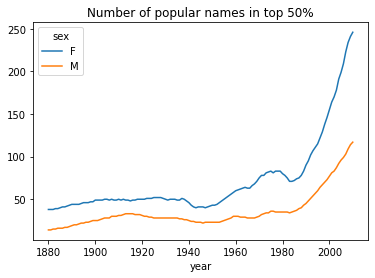

In [42]:
diversity.plot(title='Number of popular names in top 50%')

#### “最后一个字母”的变革

In [46]:
#从name列取出最后一个字母
get_last_letter =lambda x:x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
table = names.pivot_table('births',index=last_letters,columns=['sex','year'],aggfunc=sum)

选出具有一定代表性的三年，并输出前面几行

In [47]:
subtable = table.reindex(columns=[1910,1960,2010],level='year')

In [48]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [49]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [50]:
letter_prop = subtable/ subtable.sum().astype(float)

<AxesSubplot:title={'center':'FeMale'}, xlabel='last_letter'>

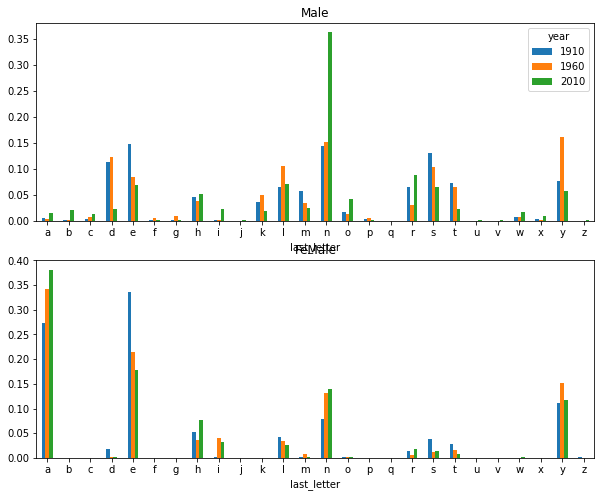

In [54]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(2,1,figsize=(10,8))
letter_prop['M'].plot(kind='bar',rot=0,ax=ax[0],title='Male')
letter_prop['F'].plot(kind='bar',rot=0,ax=ax[1],title='FeMale',legend=False)